In [146]:
import os
import re
import glob
import urllib
import toytree
import toyplot
import toyplot.pdf
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from io import StringIO

from Bio import SeqIO
from Bio import Entrez
from Bio import AlignIO
from Bio.Align.Applications import MuscleCommandline

from BCBio import GFF

In [140]:
# concat all protein aa sequences into one file
subprocess.call("cat data/protein_faa/*.faa > data/protein_faa_all_genome.faa", stdout=True, shell=True)

0

## Select annotated HSD genes from UniPort

- 3-alpha HSD `P80702`, `Q59718`, `A7B3K3`, `C8WMP0`, `P19337`, `P07914`
- 7-alpha HSD `P0AET8`, `Q5LA59`, `G9FRD7`, `P50200`, `Q8YIN7`
- 12-alpha HSD `P21215`, `R7AM69`, `C8WLK7`, `C0BWQ2`, `B0NG52`, `B6FYX7`

In [4]:
os.chdir("/Users/rootqz/Desktop/ReyLab/paper/bile_acid/analysis/hmm/")

acc_3alpha = ['P80702', 'Q59718', 'A7B3K3', 'C8WMP0', 'P19337', 'P07914']
acc_7alpha = ['P0AET8', 'Q5LA59', 'G9FRD7', 'P50200', 'Q8YIN7']
acc_12alpha = ['P21215', 'R7AM69', 'C8WLK7', 'C0BWQ2', 'B0NG52', 'B6FYX7']

metadata = pd.read_csv("data/metadata.tsv", sep="\t")

In [9]:
# download query protein sequences from UniProt

# 3-alpha
records = []
records_dict = {}
for acc in acc_3alpha:
    handle = urllib.request.urlopen("http://www.uniprot.org/uniprot/{}.xml".format(acc))
    record = SeqIO.read(handle, "uniprot-xml")
    # print("{}, {}".format(acc, record.id))
    SeqIO.write(record, "data/hsd_query/{}.fasta".format(acc), "fasta")
    records_dict[acc] = record
    records.append(record)
    SeqIO.write(records, "data/hsd_3alpha_query_UniProt.fasta", "fasta")

# 7-alpha
records = []
records_dict = {}
for acc in acc_7alpha:
    handle = urllib.request.urlopen("http://www.uniprot.org/uniprot/{}.xml".format(acc))
    record = SeqIO.read(handle, "uniprot-xml")
    # print("{}, {}".format(acc, record.id))
    SeqIO.write(record, "data/hsd_query/{}.fasta".format(acc), "fasta")
    records_dict[acc] = record
    records.append(record)
    SeqIO.write(records, "data/hsd_7alpha_query_UniProt.fasta", "fasta")
    
# 12-alpha
records = []
records_dict = {}
for acc in acc_12alpha:
    handle = urllib.request.urlopen("http://www.uniprot.org/uniprot/{}.xml".format(acc))
    record = SeqIO.read(handle, "uniprot-xml")
    # print("{}, {}".format(acc, record.id))
    SeqIO.write(record, "data/hsd_query/{}.fasta".format(acc), "fasta")
    records_dict[acc] = record
    records.append(record)
    SeqIO.write(records, "data/hsd_12alpha_query_UniProt.fasta", "fasta")

In [142]:
# concat all query sequences into one file
subprocess.call("cat data/hsd_query/*.fasta > data/hsd_query_UniProt.fasta", stdout=True, shell=True)

0

In [10]:
### build profile hmm model
# 3-alpha
# mulyiple alignment via MUSCLE
subprocess.call("muscle3.8.31_i86darwin64 -in data/hsd_3alpha_query_UniProt.fasta \
                                          -out data/hsd_3alpha_query_UniProt.afa", stdout=True, shell=True)

# convert to stockholm format
hmm1 = SeqIO.parse("data/hsd_3alpha_query_UniProt.afa", "fasta")
SeqIO.write(hmm1, "data/hsd_3alpha_query_UniProt.sto", "stockholm")

# build hmm profile
subprocess.call("hmmbuild data/hsd_3alpha_query_UniProt.hmm \
                          data/hsd_3alpha_query_UniProt.sto ", stdout=True, shell=True)

# 7-alpha
# mulyiple alignment via MUSCLE
subprocess.call("muscle3.8.31_i86darwin64 -in data/hsd_7alpha_query_UniProt.fasta \
                                          -out data/hsd_7alpha_query_UniProt.afa", stdout=True, shell=True)

# convert to stockholm format
hmm1 = SeqIO.parse("data/hsd_7alpha_query_UniProt.afa", "fasta")
SeqIO.write(hmm1, "data/hsd_7alpha_query_UniProt.sto", "stockholm")

# build hmm profile
subprocess.call("hmmbuild data/hsd_7alpha_query_UniProt.hmm \
                          data/hsd_7alpha_query_UniProt.sto ", stdout=True, shell=True)

# 12-alpha
# mulyiple alignment via MUSCLE
subprocess.call("muscle3.8.31_i86darwin64 -in data/hsd_12alpha_query_UniProt.fasta \
                                          -out data/hsd_12alpha_query_UniProt.afa", stdout=True, shell=True)

# convert to stockholm format
hmm1 = SeqIO.parse("data/hsd_12alpha_query_UniProt.afa", "fasta")
SeqIO.write(hmm1, "data/hsd_12alpha_query_UniProt.sto", "stockholm")

# build hmm profile
subprocess.call("hmmbuild data/hsd_12alpha_query_UniProt.hmm \
                          data/hsd_12alpha_query_UniProt.sto ", stdout=True, shell=True)


0

In [91]:
# for genome_file in sorted(glob.glob("data/genome/*")):
#     genome_id = genome_file.split("/")[-1]
#     taxa = metadata[metadata["genome_id"] == genome_id]["name"].tolist()[0]
    
#     # 3-alpha
#     subprocess.call("hmmsearch data/hsd_3alpha_query_UniProt.hmm \
#                                {}/{}_protein.faa > result/hmm_out/hsd_3alpha/{}.hmm.out".format(genome_file, genome_id, genome_id), stdout=True, shell=True)
    
#     # extract hit sequences information
#     with open("result/hmm_out/hsd_3alpha/{}.hmm.out".format(genome_id), "r") as hmm_out:
#         lines = hmm_out.readlines()
#         hit_genes = [x.strip()[3:].split()[0] for x in lines if x.startswith(">>")]
#         # print(hit_genes)
        
#     # parse genome gff
#     gff = open("{}/{}_genomic.gff".format(genome_file, genome_id))
#     examiner = GFF.GFFExaminer()
#     # print(examiner.available_limits(gff))
#     for record in GFF.parse(gff):
#         print(record.features[10])
#     gff.close()
    
#     with open("result/hmm_out/hsd_3alpha_{}.tsv".format(genome_id), "w") as out:
#         print("genome_id\tevalue_full\tscore_full\tbias_full\tevalue_domain\tscore_domain\tbias_domain\texp\tN\tgene", file=out)
#         i = 15
#         while len(lines[i].strip().split()) > 9:
#             hit = lines[i].strip().split()[0:9]
#             print("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}".format(genome_id,hit[0],hit[1],hit[2],hit[3],hit[4],hit[5],hit[6],hit[7],hit[8]), file=out)
#             i += 1
        
    

In [11]:
hsd_3alpha_hits = []
hsd_7alpha_hits = []
hsd_12alpha_hits = []

for genome_file in sorted(glob.glob("data/protein_faa/*.faa")):
    # print(genome_file)
    genome_id = genome_file.split("/")[-1][:-12]
    taxa = metadata[metadata["genome_id"] == genome_id]["name"].tolist()[0]
    
    # 3-alpha
    subprocess.call("hmmsearch data/hsd_3alpha_query_UniProt.hmm \
                               {} > result/hmm_out/hsd_3alpha/{}.hmm.out".format(genome_file, genome_id), stdout=True, shell=True)
    
    # 7-alpha
    subprocess.call("hmmsearch data/hsd_7alpha_query_UniProt.hmm \
                               {} > result/hmm_out/hsd_7alpha/{}.hmm.out".format(genome_file, genome_id), stdout=True, shell=True)
    
    # 12-alpha
    subprocess.call("hmmsearch data/hsd_12alpha_query_UniProt.hmm \
                               {} > result/hmm_out/hsd_12alpha/{}.hmm.out".format(genome_file, genome_id), stdout=True, shell=True)
    
    ### extract hit sequences
    with open("result/hmm_out/hsd_3alpha/{}.hmm.out".format(genome_id), "r") as hmm_out:
        lines = hmm_out.readlines()
        hit_seqs = [x.strip()[3:].split()[0] for x in lines if x.startswith(">>")]
        # hit_seqs = set(hit_seqs)
        
        # all protein sequences
        all_seqs = SeqIO.parse(genome_file, "fasta")

        if len(hit_seqs) > 0:
            # append all record to a list
            hsd_3alpha_hits = hsd_3alpha_hits + [seq for seq in all_seqs if seq.id in hit_seqs]
            
    with open("result/hmm_out/hsd_7alpha/{}.hmm.out".format(genome_id), "r") as hmm_out:
        lines = hmm_out.readlines()
        hit_seqs = [x.strip()[3:].split()[0] for x in lines if x.startswith(">>")]
        # hit_seqs = set(hit_seqs)
        
        # all protein sequences
        all_seqs = SeqIO.parse(genome_file, "fasta")
        
        if len(hit_seqs) > 0:
            # append all record to a list
            hsd_7alpha_hits = hsd_7alpha_hits + [seq for seq in all_seqs if seq.id in hit_seqs]
            
    with open("result/hmm_out/hsd_12alpha/{}.hmm.out".format(genome_id), "r") as hmm_out:
        lines = hmm_out.readlines()
        hit_seqs = [x.strip()[3:].split()[0] for x in lines if x.startswith(">>")]
        # hit_seqs = set(hit_seqs)
        
        # all protein sequences
        all_seqs = SeqIO.parse(genome_file, "fasta")
        
        if len(hit_seqs) > 0:
            # append all record to a list
            hsd_12alpha_hits = hsd_12alpha_hits + [seq for seq in all_seqs if seq.id in hit_seqs]
            
SeqIO.write(hsd_3alpha_hits, "result/hmm_out/hsd_3alpha_hmm_hits.fasta", "fasta")
SeqIO.write(hsd_7alpha_hits, "result/hmm_out/hsd_7alpha_hmm_hits.fasta", "fasta")
SeqIO.write(hsd_12alpha_hits, "result/hmm_out/hsd_12alpha_hmm_hits.fasta", "fasta")          

676

In [12]:
### table to store hmm hits information
# 3-alpha
hmm_outs = sorted(glob.glob("result/hmm_out/hsd_3alpha/*.hmm.out"))
with open("result/hmm_out/hsd_3alpha_hits.tsv", "w") as out:
    print("genome_id\tgenome_id_long\tevalue_full\tscore_full\tbias_full\tevalue_domain\tscore_domain\tbias_domain\texp\tN\tgene", file=out)
    
    for hmm_out in hmm_outs:
        genome_id_long = hmm_out.split("/")[-1][:-8]
        genome_id = hmm_out.split("/")[-1][0:15]
        with open(hmm_out, "r") as hmm_out_file:
            lines = hmm_out_file.readlines()
            i = 15
            while len(lines[i].strip().split()) > 9:
                hit = lines[i].strip().split()[0:9]
                print("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}".format(genome_id,genome_id_long,hit[0],hit[1],hit[2],hit[3],hit[4],hit[5],hit[6],hit[7],hit[8]), file=out)
                i += 1
# 7-alpha
hmm_outs = sorted(glob.glob("result/hmm_out/hsd_7alpha/*.hmm.out"))
with open("result/hmm_out/hsd_7alpha_hits.tsv", "w") as out:
    print("genome_id\tgenome_id_long\tevalue_full\tscore_full\tbias_full\tevalue_domain\tscore_domain\tbias_domain\texp\tN\tgene", file=out)
    
    for hmm_out in hmm_outs:
        genome_id_long = hmm_out.split("/")[-1][:-8]
        genome_id = hmm_out.split("/")[-1][0:15]
        with open(hmm_out, "r") as hmm_out_file:
            lines = hmm_out_file.readlines()
            i = 15
            while len(lines[i].strip().split()) > 9:
                hit = lines[i].strip().split()[0:9]
                print("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}".format(genome_id,genome_id_long,hit[0],hit[1],hit[2],hit[3],hit[4],hit[5],hit[6],hit[7],hit[8]), file=out)
                i += 1
                
# 12-alpha
hmm_outs = sorted(glob.glob("result/hmm_out/hsd_12alpha/*.hmm.out"))
with open("result/hmm_out/hsd_12alpha_hits.tsv", "w") as out:
    print("genome_id\tgenome_id_long\tevalue_full\tscore_full\tbias_full\tevalue_domain\tscore_domain\tbias_domain\texp\tN\tgene", file=out)
    
    for hmm_out in hmm_outs:
        genome_id_long = hmm_out.split("/")[-1][:-8]
        genome_id = hmm_out.split("/")[-1][0:15]
        with open(hmm_out, "r") as hmm_out_file:
            lines = hmm_out_file.readlines()
            i = 15
            while len(lines[i].strip().split()) > 9:
                hit = lines[i].strip().split()[0:9]
                print("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}".format(genome_id,genome_id_long,hit[0],hit[1],hit[2],hit[3],hit[4],hit[5],hit[6],hit[7],hit[8]), file=out)
                i += 1

### Concat hit seq with query seq for phylogenetic

In [13]:
# remove non-unique genes
seqs3 = SeqIO.parse("result/hmm_out/hsd_3alpha_hmm_hits.fasta", "fasta")
seqs3_gene = []
seqs3_out = []
for seq in seqs3:
    if seq.id not in seqs3_gene:
        seq.description = seq.description.replace(":", "")
        seq.description = seq.description.replace(",", " ")
        seqs3_out.append(seq)
        seqs3_gene.append(seq.id)
SeqIO.write(seqs3_out, "result/hsd_3alpha_hmm_hits_NR.fa", "fasta")

seqs7 = SeqIO.parse("result/hmm_out/hsd_7alpha_hmm_hits.fasta", "fasta")
seqs7_gene = []
seqs7_out = []
for seq in seqs7:
    if seq.id not in seqs7_gene:
        seq.description = seq.description.replace(":", "")
        seq.description = seq.description.replace(",", " ")
        seqs7_out.append(seq)
        seqs7_gene.append(seq.id)
SeqIO.write(seqs7_out, "result/hsd_7alpha_hmm_hits_NR.fa", "fasta")

seqs12 = SeqIO.parse("result/hmm_out/hsd_12alpha_hmm_hits.fasta", "fasta")
seqs12_gene = []
seqs12_out = []
for seq in seqs12:
    if seq.id not in seqs12_gene:
        seq.description = seq.description.replace(":", "")
        seq.description = seq.description.replace(",", " ")
        seqs12_out.append(seq)
        seqs12_gene.append(seq.id)
SeqIO.write(seqs12_out, "result/hsd_12alpha_hmm_hits_NR.fa", "fasta")


653

In [39]:
# filter query genes:
# 1) global score > 100
# 2) gene length between 200-350bp

hit_3alpha = pd.read_csv("result/hsd_3alpha_hits_merge.csv", sep=",")
hit_3alpha_gene = hit_3alpha[hit_3alpha['score_full'] > 125]['gene'].tolist()
print(len(hit_3alpha_gene))

hit_7alpha = pd.read_csv("result/hsd_7alpha_hits_merge.csv", sep=",")
hit_7alpha_gene = hit_7alpha[hit_7alpha['score_full'] > 170]['gene'].tolist()
print(len(hit_7alpha_gene))

hit_12alpha = pd.read_csv("result/hsd_12alpha_hits_merge.csv", sep=",")
hit_12alpha_gene = hit_12alpha[hit_12alpha['score_full'] > 100]['gene'].tolist()
print(len(hit_12alpha_gene))

148
172
110


(array([  5.,   7.,  73., 529.,   7.,   2.,  10.,   1.,  11.,   8.]),
 array([ 42. , 109.2, 176.4, 243.6, 310.8, 378. , 445.2, 512.4, 579.6,
        646.8, 714. ]),
 <a list of 10 Patch objects>)

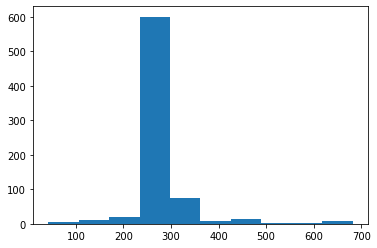

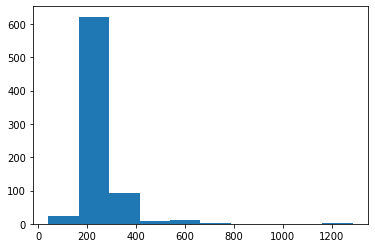

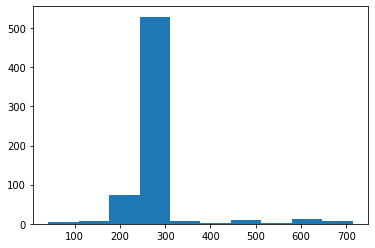

In [99]:
all_seqs_3alpha = SeqIO.parse("result/hsd_3alpha_hmm_hits_NR.fa", "fasta")
plt.figure(1)
plt.hist([len(seq.seq) for seq in all_seqs_3alpha])

plt.figure(2)
all_seqs_7alpha = SeqIO.parse("result/hsd_7alpha_hmm_hits_NR.fa", "fasta")
plt.hist([len(seq.seq) for seq in all_seqs_7alpha])

plt.figure(3)
all_seqs_12alpha = SeqIO.parse("result/hsd_12alpha_hmm_hits_NR.fa", "fasta")
plt.hist([len(seq.seq) for seq in all_seqs_12alpha])

In [41]:
all_seqs_3alpha = SeqIO.parse("result/hsd_3alpha_hmm_hits_NR.fa", "fasta")
filtered_seqs_3alpha = [seq for seq in all_seqs_3alpha if seq.id in hit_3alpha_gene and len(seq.seq) >= 200 and len(seq.seq) <= 350]
SeqIO.write(filtered_seqs_3alpha, "result/hsd_3alpha_hmm_hits_NR_filtered.fa", "fasta")

all_seqs_7alpha = SeqIO.parse("result/hsd_7alpha_hmm_hits_NR.fa", "fasta")
filtered_seqs_7alpha = [seq for seq in all_seqs_7alpha if seq.id in hit_7alpha_gene and len(seq.seq) >= 200 and len(seq.seq) <= 350]
SeqIO.write(filtered_seqs_7alpha, "result/hsd_7alpha_hmm_hits_NR_filtered.fa", "fasta")

all_seqs_12alpha = SeqIO.parse("result/hsd_12alpha_hmm_hits_NR.fa", "fasta")
filtered_seqs_12alpha = [seq for seq in all_seqs_12alpha if seq.id in hit_12alpha_gene and len(seq.seq) >= 200 and len(seq.seq) <= 350]
SeqIO.write(filtered_seqs_12alpha, "result/hsd_12alpha_hmm_hits_NR_filtered.fa", "fasta")

107

In [42]:
# concat query seq with hit seq
subprocess.call("cat data/hsd_3alpha_query_UniProt.fasta \
                     result/hsd_3alpha_hmm_hits_NR_filtered.fa > result/hsd_3alpha_concat.fa", stdout=True, shell=True)
subprocess.call("cat data/hsd_7alpha_query_UniProt.fasta \
                     result/hsd_7alpha_hmm_hits_NR_filtered.fa > result/hsd_7alpha_concat.fa", stdout=True, shell=True)
subprocess.call("cat data/hsd_12alpha_query_UniProt.fasta \
                     result/hsd_12alpha_hmm_hits_NR_filtered.fa > result/hsd_12alpha_concat.fa", stdout=True, shell=True)


0

In [43]:
# mulyiple alignment via MUSCLE
subprocess.call("muscle3.8.31_i86darwin64 -in result/hsd_3alpha_concat.fa \
                                          -out result/hsd_3alpha_concat.muscle.afa", stdout=True, shell=True)
subprocess.call("muscle3.8.31_i86darwin64 -in result/hsd_7alpha_concat.fa \
                                          -out result/hsd_7alpha_concat.muscle.afa", stdout=True, shell=True)
subprocess.call("muscle3.8.31_i86darwin64 -in result/hsd_12alpha_concat.fa \
                                          -out result/hsd_12alpha_concat.muscle.afa", stdout=True, shell=True)


0

In [44]:
# FasrTree to build phylogenetic tree
# manual: http://www.microbesonline.org/fasttree/
subprocess.call("bin/FastTree -gamma -wag result/hsd_3alpha_concat.muscle.afa > result/hsd_3alpha.tree", stdout=True, shell=True)
subprocess.call("bin/FastTree -gamma -wag result/hsd_7alpha_concat.muscle.afa > result/hsd_7alpha.tree", stdout=True, shell=True)
subprocess.call("bin/FastTree -gamma -wag result/hsd_12alpha_concat.muscle.afa > result/hsd_12alpha.tree", stdout=True, shell=True)

0

In [45]:
# draw tree, 3-alpha
tree_newick = open("result/hsd_3alpha.tree", "r").readlines()[0].strip()

# rename each gene
hit_3alpha = pd.read_csv("result/hsd_3alpha_hits_merge.csv", sep=",")
obs_3alpha = []
for i in range(hit_3alpha.shape[0]):
    tree_newick = tree_newick.replace(hit_3alpha['gene'][i], hit_3alpha['gene'][i]+'|'+hit_3alpha['name'][i])
    if not np.isnan(hit_3alpha['obs_3'][i]):
        obs_3alpha.append(hit_3alpha['gene'][i])

tree = toytree.tree(tree_newick)
colorlist = ["#d6557c" if len(tip.split("|"))==1 else "#5384a3" if tip.split("|")[0] in obs_3alpha else "grey" for tip in tree.get_tip_labels()]
canvas, axes, mark = tree.draw(use_edge_lengths=True, scalebar=True, width=1000, height=2000, tip_labels_colors=colorlist)
toyplot.pdf.render(canvas, "figure/hmm_3alpha_HSD.pdf")

In [46]:
# draw tree, 7-alpha
tree_newick = open("result/hsd_7alpha.tree", "r").readlines()[0].strip()

# rename each gene
hit_7alpha = pd.read_csv("result/hsd_7alpha_hits_merge.csv", sep=",")
obs_7alpha = []
for i in range(hit_7alpha.shape[0]):
    tree_newick = tree_newick.replace(hit_7alpha['gene'][i], hit_7alpha['gene'][i]+'|'+hit_7alpha['name'][i])
    if not np.isnan(hit_7alpha['obs_7'][i]):
        obs_7alpha.append(hit_7alpha['gene'][i])

tree = toytree.tree(tree_newick)
colorlist = ["#d6557c" if len(tip.split("|"))==1 else "#5384a3" if tip.split("|")[0] in obs_7alpha else "grey" for tip in tree.get_tip_labels()]
canvas, axes, mark = tree.draw(use_edge_lengths=True, scalebar=True, width=1000, height=2000, tip_labels_colors=colorlist)
toyplot.pdf.render(canvas, "figure/hmm_7alpha_HSD.pdf")

In [47]:
# draw tree, 12-alpha
tree_newick = open("result/hsd_12alpha.tree", "r").readlines()[0].strip()

# rename each gene
hit_12alpha = pd.read_csv("result/hsd_12alpha_hits_merge.csv", sep=",")
obs_12alpha = []
for i in range(hit_12alpha.shape[0]):
    tree_newick = tree_newick.replace(hit_12alpha['gene'][i], hit_12alpha['gene'][i]+'|'+hit_12alpha['name'][i])
    if not np.isnan(hit_12alpha['obs_12'][i]):
        obs_12alpha.append(hit_12alpha['gene'][i])

tree = toytree.tree(tree_newick)
colorlist = ["#d6557c" if len(tip.split("|"))==1 else "#5384a3" if tip.split("|")[0] in obs_12alpha else "grey" for tip in tree.get_tip_labels()]
canvas, axes, mark = tree.draw(use_edge_lengths=True, scalebar=True, width=1000, height=2000, tip_labels_colors=colorlist)
toyplot.pdf.render(canvas, "figure/hmm_12alpha_HSD.pdf")

## Bile salt hydrolase (BSH)

- `Q06115`, `P54965`, `Q9KK62`

In [3]:
acc_bsh = ['Q06115', 'P54965', 'Q9KK62']

# download query protein sequences from UniProt
records = []
records_dict = {}
for acc in acc_bsh:
    handle = urllib.request.urlopen("http://www.uniprot.org/uniprot/{}.xml".format(acc))
    record = SeqIO.read(handle, "uniprot-xml")
    # print("{}, {}".format(acc, record.id))
    SeqIO.write(record, "data/hsd_query/{}.fasta".format(acc), "fasta")
    records_dict[acc] = record
    records.append(record)
    SeqIO.write(records, "data/bsh_query_UniProt.fasta", "fasta")

### build profile hmm model
# mulyiple alignment via MUSCLE
subprocess.call("muscle3.8.31_i86darwin64 -in data/bsh_query_UniProt.fasta \
                                          -out data/bsh_query_UniProt.afa", stdout=True, shell=True)

# convert to stockholm format
hmm1 = SeqIO.parse("data/bsh_query_UniProt.afa", "fasta")
SeqIO.write(hmm1, "data/bsh_query_UniProt.sto", "stockholm")

# build hmm profile
subprocess.call("hmmbuild data/bsh_query_UniProt.hmm \
                          data/bsh_query_UniProt.sto ", stdout=True, shell=True)

# perform profile hmm
bsh_hits = []

for genome_file in sorted(glob.glob("data/protein_faa/*.faa")):
    genome_id = genome_file.split("/")[-1][:-12]
    taxa = metadata[metadata["genome_id"] == genome_id]["name"].tolist()[0]
    
    subprocess.call("hmmsearch data/bsh_query_UniProt.hmm \
                               {} > result/hmm_out/bsh/{}.hmm.out".format(genome_file, genome_id), stdout=True, shell=True)
 
    ### extract hit sequences
    with open("result/hmm_out/bsh/{}.hmm.out".format(genome_id), "r") as hmm_out:
        lines = hmm_out.readlines()
        hit_seqs = [x.strip()[3:].split()[0] for x in lines if x.startswith(">>")]
        # hit_seqs = set(hit_seqs)
        
        # all protein sequences
        all_seqs = SeqIO.parse(genome_file, "fasta")

        if len(hit_seqs) > 0:
            # append all record to a list
            bsh_hits = bsh_hits + [seq for seq in all_seqs if seq.id in hit_seqs]
            
SeqIO.write(bsh_hits, "result/hmm_out/bsh_hmm_hits.fasta", "fasta")

### table to store hmm hits information
hmm_outs = sorted(glob.glob("result/hmm_out/bsh/*.hmm.out"))
with open("result/hmm_out/bsh_hits.tsv", "w") as out:
    print("genome_id\tgenome_id_long\tevalue_full\tscore_full\tbias_full\tevalue_domain\tscore_domain\tbias_domain\texp\tN\tgene", file=out)
    
    for hmm_out in hmm_outs:
        genome_id_long = hmm_out.split("/")[-1][:-8]
        genome_id = hmm_out.split("/")[-1][0:15]
        with open(hmm_out, "r") as hmm_out_file:
            lines = hmm_out_file.readlines()
            i = 15
            while len(lines[i].strip().split()) > 9:
                hit = lines[i].strip().split()[0:9]
                print("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}".format(genome_id,genome_id_long,hit[0],hit[1],hit[2],hit[3],hit[4],hit[5],hit[6],hit[7],hit[8]), file=out)
                i += 1
                
# remove non-unique genes
seqs = SeqIO.parse("result/hmm_out/bsh_hmm_hits.fasta", "fasta")
seqs_gene = []
seqs_out = []
for seq in seqs:
    if seq.id not in seqs_gene:
        seq.description = seq.description.replace(":", "")
        seq.description = seq.description.replace(",", " ")
        seqs_out.append(seq)
        seqs_gene.append(seq.id)
SeqIO.write(seqs_out, "result/bsh_hmm_hits_NR.fa", "fasta")

76

21


0

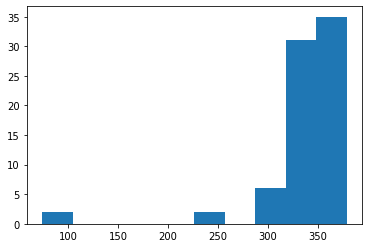

In [8]:
# filter query genes:
# 1) global score > 75
# 2) gene length between >270bp

hit_bsh = pd.read_csv("result/bsh_hits_merge.csv", sep=",")
hit_bsh_gene = hit_bsh[hit_bsh['score_full'] > 75]['gene'].tolist()
print(len(hit_bsh_gene))

all_seqs_bsh = SeqIO.parse("result/bsh_hmm_hits_NR.fa", "fasta")
plt.hist([len(seq.seq) for seq in all_seqs_bsh])

all_seqs_bsh = SeqIO.parse("result/bsh_hmm_hits_NR.fa", "fasta")
filtered_seqs_bsh = [seq for seq in all_seqs_bsh if seq.id in hit_bsh_gene and len(seq.seq) >= 270]
SeqIO.write(filtered_seqs_bsh, "result/bsh_hmm_hits_NR_filtered.fa", "fasta")

# concat query seq with hit seq
subprocess.call("cat data/bsh_query_UniProt.fasta \
                     result/bsh_hmm_hits_NR_filtered.fa > result/bsh_concat.fa", stdout=True, shell=True)

# mulyiple alignment via MUSCLE
subprocess.call("muscle3.8.31_i86darwin64 -in result/bsh_concat.fa \
                                          -out result/bsh_concat.muscle.afa", stdout=True, shell=True)

# FasrTree to build phylogenetic tree
# manual: http://www.microbesonline.org/fasttree/
subprocess.call("bin/FastTree -gamma -wag result/bsh_concat.muscle.afa > result/bsh.tree", stdout=True, shell=True)

In [10]:
# draw tree
tree_newick = open("result/bsh.tree", "r").readlines()[0].strip()

# rename each gene
hit_bsh = pd.read_csv("result/bsh_hits_merge.csv", sep=",")
obs_bsh = []
for i in range(hit_bsh.shape[0]):
    tree_newick = tree_newick.replace(hit_bsh['gene'][i], hit_bsh['gene'][i]+'|'+hit_bsh['name'][i])

tree = toytree.tree(tree_newick)
colorlist = ["#d6557c" if len(tip.split("|"))==1 else "grey" for tip in tree.get_tip_labels()]
canvas, axes, mark = tree.draw(use_edge_lengths=True, scalebar=True, width=1000, height=700, tip_labels_colors=colorlist)
toyplot.pdf.render(canvas, "figure/hmm_bsh.pdf")

### Adding genes from high level activities from the experiments

Based on the phylogenetic relationship, manually pick the most closest ones in each genome

- 3-HSD:
    - Collinsella intestinalis: `WP_006723164.1`
    - Ruminococcus GM2/1: NA
    - Ruminococcus gnavus: `WP_004842535.1`
    - Collinsella aerofaciens: `WP_006235022.1`

- 7-HSD:
    - Bacteroides thetaiotaomicron VPI-5482, `WP_008762708.1`
    - Bacteroides intestinalis, `WP_007209579.1`
    - Bacteroides xylanisolvens, `CBK69681.1`
    - Bacteroides caccae, `WP_005679069.1`
    - Bacteroides finegoldii, `WP_004299904.1`
    - Bacteroides thetaiotaomicron 7330, same with Bacteroides thetaiotaomicron VPI-5482

- 12-HSD:
    - Bacteroides thetaiotaomicron VPI-5482: `WP_008766263.1`
    - Bacteroides intestinalis: `WP_007211540.1`
    - E. coli K12: `WP_000483353.1`
    - Eubacterium ramosum: NA
    - Coprococcus comes: `EEG88483.1`

In [2]:
def search_gene(gene_ids, seqs_file):
    '''
    Function to search gene record given the gene id from selected genomes.
    Input: gene_id
    Output: a list of sequence record, BioPython format, non-redundant
    
    '''
    seqs = SeqIO.parse(seqs_file, "fasta")
    
    records = []
    ids = []
    
    # return [seq for seq in seqs if seq.id.startswith(gene_id)]
    # return [seq for seq in seqs if seq.id in gene_ids]
    
    for seq in seqs:
        if seq.id in gene_ids and seq.id not in ids:
            records.append(seq)
            ids.append(seq.id)
    
    return records

In [17]:
def hmm_extra(gene_family):
    '''
    Function to perform hmm searching adding extra "seed" genes from genome, 
    where high BA activities were observed in experiments
    
    Input: gene_family, the name of gene family, e.g., 'hsd_3', 'hsd_7', 'hsd_12'
    
    '''
    # concat query
    subprocess.call("cat data/{}alpha_query_UniProt.fasta data/hsd_query/extra/{}_extra_query.fa > data/extra/{}_query_extra.fa".format(gene_family,gene_family,gene_family), stdout=True, shell=True)

    ### build profile hmm model
    # mulyiple alignment via MUSCLE
    subprocess.call("muscle3.8.31_i86darwin64 -in data/extra/{}_query_extra.fa \
                                              -out data/extra/{}_query_extra.afa".format(gene_family,gene_family), stdout=True, shell=True)

    # convert to stockholm format
    hmm1 = SeqIO.parse("data/extra/{}_query_extra.afa".format(gene_family), "fasta")
    SeqIO.write(hmm1, "data/extra/{}_query_extra.sto".format(gene_family), "stockholm")

    # build hmm profile
    subprocess.call("hmmbuild data/extra/{}_query_extra.hmm \
                              data/extra/{}_query_extra.sto".format(gene_family,gene_family), stdout=True, shell=True)

    # perform profile hmm
    hsd7_hits = []

    for genome_file in sorted(glob.glob("data/protein_faa/*.faa")):
        genome_id = genome_file.split("/")[-1][:-12]
        taxa = metadata[metadata["genome_id"] == genome_id]["name"].tolist()[0]

        subprocess.call("hmmsearch data/extra/{}_query_extra.hmm \
                                   {} > result/hmm_out/{}_extra/{}.hmm.out".format(gene_family,genome_file,gene_family,genome_id), stdout=True, shell=True)

        ### extract hit sequences
        with open("result/hmm_out/{}_extra/{}.hmm.out".format(gene_family,genome_id), "r") as hmm_out:
            lines = hmm_out.readlines()
            hit_seqs = [x.strip()[3:].split()[0] for x in lines if x.startswith(">>")]
            # hit_seqs = set(hit_seqs)

            # all protein sequences
            all_seqs = SeqIO.parse(genome_file, "fasta")

            if len(hit_seqs) > 0:
                # append all record to a list
                hsd7_hits = hsd7_hits + [seq for seq in all_seqs if seq.id in hit_seqs]

    SeqIO.write(hsd7_hits, "result/hmm_out/{}_extra_hmm_hits.fasta".format(gene_family), "fasta")

    ### table to store hmm hits information
    hmm_outs = sorted(glob.glob("result/hmm_out/{}_extra/*.hmm.out".format(gene_family)))
    with open("result/hmm_out/{}_extra_hits.tsv".format(gene_family), "w") as out:
        print("genome_id\tgenome_id_long\tevalue_full\tscore_full\tbias_full\tevalue_domain\tscore_domain\tbias_domain\texp\tN\tgene", file=out)

        for hmm_out in hmm_outs:
            genome_id_long = hmm_out.split("/")[-1][:-8]
            genome_id = hmm_out.split("/")[-1][0:15]
            with open(hmm_out, "r") as hmm_out_file:
                lines = hmm_out_file.readlines()
                i = 15
                while len(lines[i].strip().split()) > 9:
                    hit = lines[i].strip().split()[0:9]
                    print("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}".format(genome_id,genome_id_long,hit[0],hit[1],hit[2],hit[3],hit[4],hit[5],hit[6],hit[7],hit[8]), file=out)
                    i += 1

    # remove non-unique genes
    seqs = SeqIO.parse("result/hmm_out/{}_extra_hmm_hits.fasta".format(gene_family), "fasta")
    seqs_gene = []
    seqs_out = []
    for seq in seqs:
        if seq.id not in seqs_gene:
            seq.description = seq.description.replace(":", "")
            seq.description = seq.description.replace(",", " ")
            seqs_out.append(seq)
            seqs_gene.append(seq.id)
    SeqIO.write(seqs_out, "result/{}_extra_hmm_hits_NR.fa".format(gene_family), "fasta")

In [52]:
def draw_tree(gene_family, min_len, max_len):
    '''
    Function to draw phylogenetic tree, after merging genes annotation in genome via R
    
    Input: gene_family, the name of gene family, e.g., 'hsd_3', 'hsd_7', 'hsd_12'
           # cutoff: cutoff score of profile hmm hit score, use: 1) median/3nd quantile of all hits; or 2) use average of obs genome hits
           min_len: minimal gene length filtering
           max_len: maximal gene length filtering
    '''
    hit_hsd = pd.read_csv("result/{}_extra_hits_merge.csv".format(gene_family), sep=",")
    plt.hist(hit_hsd['score_full'])

    cutoff = np.percentile(hit_hsd['score_full'], 75)
    print("Cutoff for {} is {}\n".format(gene_family, cutoff))
    hit_hsd_gene = hit_hsd[hit_hsd['score_full'] > cutoff]['gene'].tolist()
    print(len(hit_hsd_gene))

    # all_seqs_hsd = SeqIO.parse("result/{}_extra_hmm_hits_NR.fa".format(gene_family), "fasta")
    # plt.hist([len(seq.seq) for seq in all_seqs_hsd7])

    all_seqs_hsd = SeqIO.parse("result/{}_extra_hmm_hits_NR.fa".format(gene_family), "fasta")
    filtered_seqs_hsd = [seq for seq in all_seqs_hsd if seq.id in hit_hsd_gene and len(seq.seq) >= min_len and len(seq.seq) <= max_len]
    SeqIO.write(filtered_seqs_hsd, "result/{}_extra_hmm_hits_NR_filtered.fa".format(gene_family), "fasta")

    # concat query seq with hit seq
    subprocess.call("cat data/{}alpha_query_UniProt.fasta \
                         result/{}_extra_hmm_hits_NR_filtered.fa > result/{}_extra_concat.fa".format(gene_family,gene_family,gene_family), stdout=True, shell=True)

    # mulyiple alignment via MUSCLE
    subprocess.call("muscle3.8.31_i86darwin64 -in result/{}_extra_concat.fa \
                                              -out result/{}_extra_concat.muscle.afa".format(gene_family,gene_family), stdout=True, shell=True)

    # FasrTree to build phylogenetic tree
    # manual: http://www.microbesonline.org/fasttree/
    subprocess.call("bin/FastTree -gamma -wag result/{}_extra_concat.muscle.afa > result/{}_extra.tree".format(gene_family,gene_family), stdout=True, shell=True)
    
    # draw tree
    tree_newick = open("result/{}_extra.tree".format(gene_family), "r").readlines()[0].strip()

    # rename each gene
    hit_hsd_extra = pd.read_csv("result/{}_extra_hits_merge.csv".format(gene_family), sep=",")
    obs_hsd_extra = []
    for i in range(hit_hsd_extra.shape[0]):
        tree_newick = tree_newick.replace(hit_hsd_extra['gene'][i], hit_hsd_extra['gene'][i]+'|'+hit_hsd_extra['name'][i])
        # 'obs_'+gene_family.split("_")[1] is 'obs_7' for example
        if not np.isnan(hit_hsd_extra['obs_'+gene_family.split("_")[1]][i]):
            obs_hsd_extra.append(hit_hsd_extra['gene'][i])
    tree = toytree.tree(tree_newick)
    colorlist = ["#d6557c" if len(tip.split("|"))==1 else "#5384a3" if tip.split("|")[0] in obs_hsd_extra else "grey" for tip in tree.get_tip_labels()]
    canvas, axes, mark = tree.draw(use_edge_lengths=True, scalebar=True, width=1000, height=2000, tip_labels_colors=colorlist)
    toyplot.pdf.render(canvas, "figure/hmm_{}_extra.pdf".format(gene_family))

In [19]:
# # concat query
# subprocess.call("cat data/hsd_7alpha_query_UniProt.fasta data/hsd_query/extra/hsd_7_extra_query.fa > data/extra/hsd_7_query_extra.fa", stdout=True, shell=True)

# ### build profile hmm model
# # mulyiple alignment via MUSCLE
# subprocess.call("muscle3.8.31_i86darwin64 -in data/extra/hsd_7_query_extra.fa \
#                                           -out data/extra/hsd_7_query_extra.afa", stdout=True, shell=True)

# # convert to stockholm format
# hmm1 = SeqIO.parse("data/extra/hsd_7_query_extra.afa", "fasta")
# SeqIO.write(hmm1, "data/extra/hsd_7_query_extra.sto", "stockholm")

# # build hmm profile
# subprocess.call("hmmbuild data/extra/hsd_7_query_extra.hmm \
#                           data/extra/hsd_7_query_extra.sto ", stdout=True, shell=True)

# # perform profile hmm
# hsd7_hits = []

# for genome_file in sorted(glob.glob("data/protein_faa/*.faa")):
#     genome_id = genome_file.split("/")[-1][:-12]
#     taxa = metadata[metadata["genome_id"] == genome_id]["name"].tolist()[0]
    
#     subprocess.call("hmmsearch data/extra/hsd_7_query_extra.hmm \
#                                {} > result/hmm_out/hsd7_extra/{}.hmm.out".format(genome_file, genome_id), stdout=True, shell=True)
 
#     ### extract hit sequences
#     with open("result/hmm_out/hsd7_extra/{}.hmm.out".format(genome_id), "r") as hmm_out:
#         lines = hmm_out.readlines()
#         hit_seqs = [x.strip()[3:].split()[0] for x in lines if x.startswith(">>")]
#         # hit_seqs = set(hit_seqs)
        
#         # all protein sequences
#         all_seqs = SeqIO.parse(genome_file, "fasta")

#         if len(hit_seqs) > 0:
#             # append all record to a list
#             hsd7_hits = hsd7_hits + [seq for seq in all_seqs if seq.id in hit_seqs]
            
# SeqIO.write(hsd7_hits, "result/hmm_out/hsd7_extra_hmm_hits.fasta", "fasta")

# ### table to store hmm hits information
# hmm_outs = sorted(glob.glob("result/hmm_out/hsd7_extra/*.hmm.out"))
# with open("result/hmm_out/hsd7_extra_hits.tsv", "w") as out:
#     print("genome_id\tgenome_id_long\tevalue_full\tscore_full\tbias_full\tevalue_domain\tscore_domain\tbias_domain\texp\tN\tgene", file=out)
    
#     for hmm_out in hmm_outs:
#         genome_id_long = hmm_out.split("/")[-1][:-8]
#         genome_id = hmm_out.split("/")[-1][0:15]
#         with open(hmm_out, "r") as hmm_out_file:
#             lines = hmm_out_file.readlines()
#             i = 15
#             while len(lines[i].strip().split()) > 9:
#                 hit = lines[i].strip().split()[0:9]
#                 print("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}".format(genome_id,genome_id_long,hit[0],hit[1],hit[2],hit[3],hit[4],hit[5],hit[6],hit[7],hit[8]), file=out)
#                 i += 1
                
# # remove non-unique genes
# seqs = SeqIO.parse("result/hmm_out/hsd7_extra_hmm_hits.fasta", "fasta")
# seqs_gene = []
# seqs_out = []
# for seq in seqs:
#     if seq.id not in seqs_gene:
#         seq.description = seq.description.replace(":", "")
#         seq.description = seq.description.replace(",", " ")
#         seqs_out.append(seq)
#         seqs_gene.append(seq.id)
# SeqIO.write(seqs_out, "result/hsd7_extra_hmm_hits_NR.fa", "fasta")


In [25]:
# hit_hsd7 = pd.read_csv("result/hsd7_extra_hits_merge.csv", sep=",")
# plt.hist(hit_hsd7['score_full'])

# hit_hsd7_gene = hit_hsd7[hit_hsd7['score_full'] > 180]['gene'].tolist()
# print(len(hit_hsd7_gene))

# all_seqs_hsd7 = SeqIO.parse("result/hsd7_extra_hmm_hits_NR.fa", "fasta")
# # plt.hist([len(seq.seq) for seq in all_seqs_hsd7])

# all_seqs_hsd7 = SeqIO.parse("result/hsd7_extra_hmm_hits_NR.fa", "fasta")
# filtered_seqs_hsd7 = [seq for seq in all_seqs_hsd7 if seq.id in hit_hsd7_gene and len(seq.seq) >= 200 and len(seq.seq) <= 350]
# SeqIO.write(filtered_seqs_hsd7, "result/hsd7_extra_hmm_hits_NR_filtered.fa", "fasta")

# # concat query seq with hit seq
# subprocess.call("cat data/hsd_7alpha_query_UniProt.fasta \
#                      result/hsd7_extra_hmm_hits_NR_filtered.fa > result/hsd7_extra_concat.fa", stdout=True, shell=True)

# # mulyiple alignment via MUSCLE
# subprocess.call("muscle3.8.31_i86darwin64 -in result/hsd7_extra_concat.fa \
#                                           -out result/hsd7_extra_concat.muscle.afa", stdout=True, shell=True)

# # FasrTree to build phylogenetic tree
# # manual: http://www.microbesonline.org/fasttree/
# subprocess.call("bin/FastTree -gamma -wag result/hsd7_extra_concat.muscle.afa > result/hsd7_extra.tree", stdout=True, shell=True)

In [24]:
# # draw tree
# tree_newick = open("result/hsd7_extra.tree", "r").readlines()[0].strip()

# # rename each gene
# hit_hsd7_extra = pd.read_csv("result/hsd7_extra_hits_merge.csv", sep=",")
# obs_hsd7_extra = []
# for i in range(hit_hsd7_extra.shape[0]):
#     tree_newick = tree_newick.replace(hit_hsd7_extra['gene'][i], hit_hsd7_extra['gene'][i]+'|'+hit_hsd7_extra['name'][i])
#     if not np.isnan(hit_hsd7_extra['obs_7'][i]):
#         obs_hsd7_extra.append(hit_hsd7_extra['gene'][i])
# tree = toytree.tree(tree_newick)
# colorlist = ["#d6557c" if len(tip.split("|"))==1 else "#5384a3" if tip.split("|")[0] in obs_hsd7_extra else "grey" for tip in tree.get_tip_labels()]
# canvas, axes, mark = tree.draw(use_edge_lengths=True, scalebar=True, width=1000, height=1700, tip_labels_colors=colorlist)
# toyplot.pdf.render(canvas, "figure/hmm_hsd7_extra.pdf")

In [55]:
hsd_3 = ['WP_006723164.1', 'WP_004842535.1', 'WP_006235022.1']
all_protein = 'data/protein_faa_all_genome.faa'

SeqIO.write(search_gene(hsd_3, all_protein), "data/hsd_query/extra/hsd_3_extra_query.fa", "fasta")

gene_family = 'hsd_3'
hmm_extra(gene_family)

Cutoff for hsd_3 is 169.05

184


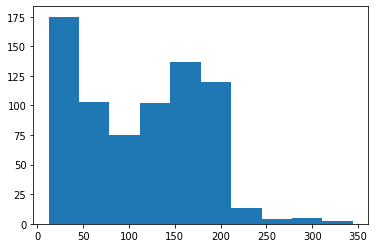

In [56]:
# run R
# then back to py function
draw_tree(gene_family, 200, 350)

In [57]:
hsd_7 = ['WP_008762708.1', 'WP_007209579.1', 'CBK69681.1', 'WP_005679069.1', 'WP_004299904.1']
all_protein = 'data/protein_faa_all_genome.faa'

SeqIO.write(search_gene(hsd_7, all_protein), "data/hsd_query/extra/hsd_7_extra_query.fa", "fasta")

gene_family = 'hsd_7'
hmm_extra(gene_family)

Cutoff for hsd_7 is 184.2

176


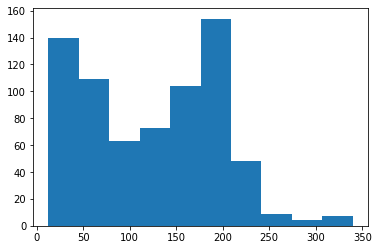

In [58]:
# run R
# then back to py function
draw_tree(gene_family, 200, 350)

In [59]:
hsd_12 = ['WP_008766263.1', 'WP_007211540.1', 'WP_000483353.1', 'EEG88483.1']
all_protein = 'data/protein_faa_all_genome.faa'

SeqIO.write(search_gene(hsd_12, all_protein), "data/hsd_query/extra/hsd_12_extra_query.fa", "fasta")

gene_family = 'hsd_12'
hmm_extra(gene_family)

Cutoff for hsd_12 is 189.7

202


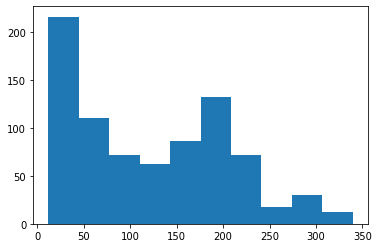

In [60]:
# run R
# then back to py function
draw_tree(gene_family, 200, 350)

### search all query genes to 3 original profile hmm

w/o adding extra genes from genome

In [63]:
# 3-alpha
subprocess.call("hmmsearch data/hsd_3alpha_query_UniProt.hmm \
                           data/hsd_query_UniProt.fasta > result/hmm_out/all_query_to_hsd_3.hmm.out", stdout=True, shell=True)
# 7-alpha
subprocess.call("hmmsearch data/hsd_7alpha_query_UniProt.hmm \
                           data/hsd_query_UniProt.fasta > result/hmm_out/all_query_to_hsd_7.hmm.out", stdout=True, shell=True)
# 12-alpha
subprocess.call("hmmsearch data/hsd_12alpha_query_UniProt.hmm \
                           data/hsd_query_UniProt.fasta > result/hmm_out/all_query_to_hsd_12.hmm.out", stdout=True, shell=True)

### table to store hmm hits information
with open("result/hmm_out/all_query_to_hsd_3_hits.tsv", "w") as out:
    print("evalue_full\tscore_full\tbias_full\tevalue_domain\tscore_domain\tbias_domain\texp\tN\tgene", file=out)
    with open("result/hmm_out/all_query_to_hsd_3.hmm.out", "r") as hmm_out_file:
        lines = hmm_out_file.readlines()
        i = 15
        while len(lines[i].strip().split()) > 9:
            hit = lines[i].strip().split()[0:9]
            print("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}".format(hit[0],hit[1],hit[2],hit[3],hit[4],hit[5],hit[6],hit[7],hit[8]), file=out)
            i += 1

### table to store hmm hits information
with open("result/hmm_out/all_query_to_hsd_7_hits.tsv", "w") as out:
    print("evalue_full\tscore_full\tbias_full\tevalue_domain\tscore_domain\tbias_domain\texp\tN\tgene", file=out)
    with open("result/hmm_out/all_query_to_hsd_7.hmm.out", "r") as hmm_out_file:
        lines = hmm_out_file.readlines()
        i = 15
        while len(lines[i].strip().split()) > 9:
            hit = lines[i].strip().split()[0:9]
            print("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}".format(hit[0],hit[1],hit[2],hit[3],hit[4],hit[5],hit[6],hit[7],hit[8]), file=out)
            i += 1

### table to store hmm hits information
with open("result/hmm_out/all_query_to_hsd_12_hits.tsv", "w") as out:
    print("evalue_full\tscore_full\tbias_full\tevalue_domain\tscore_domain\tbias_domain\texp\tN\tgene", file=out)
    with open("result/hmm_out/all_query_to_hsd_12.hmm.out", "r") as hmm_out_file:
        lines = hmm_out_file.readlines()
        i = 15
        while len(lines[i].strip().split()) > 9:
            hit = lines[i].strip().split()[0:9]
            print("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}".format(hit[0],hit[1],hit[2],hit[3],hit[4],hit[5],hit[6],hit[7],hit[8]), file=out)
            i += 1


### phylogenetic for predicted genes and "seed" genes

In [143]:
hmm_out = pd.read_csv("result/hmm_out_hsd_genes_20210419.csv", sep=",")
genes_3 = hmm_out[hmm_out['hmm_3'] == 3.0]['gene'].tolist()
genes_7 = hmm_out[hmm_out['hmm_7'] == 7.0]['gene'].tolist()
genes_12 = hmm_out[hmm_out['hmm_12'] == 12.0]['gene'].tolist()

genes = list(set(genes_3+ genes_7+ genes_12))

all_protein = 'data/protein_faa_all_genome.faa'
SeqIO.write(search_gene(genes, all_protein), "result/hmm_out_genes.fa", "fasta")

# concat 
subprocess.call("cat data/hsd_query_UniProt.fasta result/hmm_out_genes.fa > result/hmm_out_merge_with_query.fa", stdout=True, shell=True)

# mulyiple alignment via MUSCLE
subprocess.call("muscle3.8.31_i86darwin64 -in result/hmm_out_merge_with_query.fa \
                                          -out result/hmm_out_merge_with_query.muscle.afa", stdout=True, shell=True)

# FasrTree to build phylogenetic tree
# manual: http://www.microbesonline.org/fasttree/
subprocess.call("bin/FastTree -gamma -wag result/hmm_out_merge_with_query.muscle.afa > result/hmm_out_merge_with_query.tree".format(gene_family,gene_family), stdout=True, shell=True)

# draw tree
tree_newick = open("result/hmm_out_merge_with_query.tree", "r").readlines()[0].strip()

# rename each gene
hmm_out_filter = hmm_out[hmm_out.gene.isin([x for x in hmm_out['gene'].tolist() if x in genes])]
for i in range(hmm_out_filter.shape[0]):
    tree_newick = tree_newick.replace(hmm_out_filter['gene'].tolist()[i], hmm_out_filter['gene'].tolist()[i]+'|'+hmm_out_filter['name'].tolist()[i])
    
acc_3alpha = ['P80702', 'Q59718', 'A7B3K3', 'C8WMP0', 'P19337', 'P07914']
acc_7alpha = ['P0AET8', 'Q5LA59', 'G9FRD7', 'P50200', 'Q8YIN7']
acc_12alpha = ['P21215', 'R7AM69', 'C8WLK7', 'C0BWQ2', 'B0NG52', 'B6FYX7']

tree = toytree.tree(tree_newick)
colorlist = ["#ff8303" if tip.split("|")[0] in acc_7alpha else 
             "#fdca40" if tip.split("|")[0] in genes_7 else 
             "#c67ace" if tip.split("|")[0] in acc_12alpha else 
             "#fdbaf8" if tip.split("|")[0] in genes_12 else 
             "#0061a8" if tip.split("|")[0] in acc_3alpha else 
             "#8ab6d6" if tip.split("|")[0] in genes_3 else 
             "grey" for tip in tree.get_tip_labels()]
canvas, axes, mark = tree.draw(use_edge_lengths=True, scalebar=True, width=1000, height=1000, tip_labels_colors=colorlist)
toyplot.pdf.render(canvas, "figure/hmm_out_merge_with_query.pdf".format(gene_family))

In [156]:
acc_3alpha = ['P80702', 'Q59718', 'A7B3K3', 'C8WMP0', 'P19337', 'P07914']
acc_7alpha = ['P0AET8', 'Q5LA59', 'G9FRD7', 'P50200', 'Q8YIN7']
acc_12alpha = ['P21215', 'R7AM69', 'C8WLK7', 'C0BWQ2', 'B0NG52', 'B6FYX7']

tree = toytree.tree(tree_newick)
colorlist = ["#ff8303" if tip.split("|")[0] in acc_7alpha else 
             "#fdca40" if tip.split("|")[0] in genes_7 else 
             "#c67ace" if tip.split("|")[0] in acc_12alpha else 
             "#fdbaf8" if tip.split("|")[0] in genes_12 else 
             "#0061a8" if tip.split("|")[0] in acc_3alpha else 
             "#8ab6d6" if tip.split("|")[0] in genes_3 else 
             "grey" for tip in tree.get_tip_labels()]
canvas, axes, mark = tree.draw(use_edge_lengths=True, scalebar=True, width=1000, height=1000, tip_labels_colors=colorlist)
toyplot.pdf.render(canvas, "figure/hmm_out_merge_with_query.pdf")

In [163]:
canvas = toyplot.Canvas(800, 400)
axes = canvas.cartesian(grid=(1,5,0,1,0,4))
m1 = canvas.cartesian(grid=(1,2,0), margin=25).scatterplot([1,2], [1,2], color=["#ff8303"])
m2 = canvas.cartesian(grid=(1,2,0), margin=25).scatterplot([1,2], [1,2], color=["#fdca40"])
m3 = canvas.cartesian(grid=(1,2,0), margin=25).scatterplot([1,2], [1,2], color=["#c67ace"])
m4 = canvas.cartesian(grid=(1,2,0), margin=25).scatterplot([1,2], [1,2], color=["#fdbaf8"])
m5 = canvas.cartesian(grid=(1,2,0), margin=25).scatterplot([1,2], [1,2], color=["#0061a8"])
m6 = canvas.cartesian(grid=(1,2,0), margin=25).scatterplot([1,2], [1,2], color=["#8ab6d6"])

canvas.legend([
        ("HMM 3-alpha model genes", m5),
        ("predicted 3-alpha genes", m6),
        ("HMM 7-alpha model genes", m1),
        ("predicted 7-alpha genes", m2),
        ("HMM 12-alpha model genes", m3),
        ("predicted 12-alpha genes", m4)])

toyplot.pdf.render(canvas, "figure/hmm_out_merge_with_query_legend.pdf")